# Imports

In [ ]:
pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import numpy as np
import re
from keras.callbacks import History
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping

2024-01-02 08:55:50.325248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 08:55:50.923524: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-02 08:55:50.930616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-02 08:55:50.930637: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Exploring Datasets

In [ ]:
df1= pd.read_csv('MHD Train data.csv')

In [ ]:
df2=pd.read_csv('MHD Test data.csv')

In [ ]:
df1.head()

,ID,Tweet,Topic,Manual \nSentiment,Automatic Sentiment \nArabert LArge,Sentiment\n Probability
0,1,ابحث عن اسباب الارق وعالجها,الارق,1,1,0.757036
1,2,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,الاكتئاب,1,1,0.577320
2,3,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,الاكتئاب,1,1,0.995972
3,4,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,ثنائي القطب,0,0,0.998994
4,5,اتشافي من ثنائي القطب,ثنائي القطب,1,1,0.970769


In [ ]:
df2.head()

,ID,Tweet,Topic,Manual \nSentiment,Automatic Sentiment \nArabert LArge,Sentiment\n Probability
0,1,اتابع سخط قلق شكوي كثيرين علي وسائل التفاعل ا...,القلق,0,0,0.988868
1,2,اترك عنك المثاليه علاج الاكتئاب بذكر الله سبح...,الاكتئاب,1,1,0.971001
2,3,اتفه انواع البشر لي يقعد ما يعرفكش الا وقت ال...,الضغط النفسي,0,0,0.993384
3,4,اتمني العمر ميخلصش قبل ما تلاقي الشخص اللي تق...,الارق,1,1,0.927087
4,5,اتمني ان تجمعني الحياه بكل ما هو حنون ان يقع...,القلق,1,1,0.995857


In [ ]:
df3 = pd.concat([df1, df2], ignore_index=True)

# Display the merged DataFrame
df3.head()

,ID,Tweet,Topic,Manual \nSentiment,Automatic Sentiment \nArabert LArge,Sentiment\n Probability
0,1,ابحث عن اسباب الارق وعالجها,الارق,1,1,0.757036
1,2,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,الاكتئاب,1,1,0.577320
2,3,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,الاكتئاب,1,1,0.995972
3,4,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,ثنائي القطب,0,0,0.998994
4,5,اتشافي من ثنائي القطب,ثنائي القطب,1,1,0.970769


In [ ]:
df4=pd.read_csv('final_dataset.csv')

In [ ]:
df3.shape

(3500, 6)

In [ ]:
df3.isnull().sum()

ID                                      0
Tweet                                   0
Topic                                   1
Manual \nSentiment                      0
Automatic Sentiment \nArabert LArge     0
 Sentiment\n Probability                0
dtype: int64

In [ ]:
df3.duplicated().sum()

0

In [ ]:
df3['Topic'].unique()

array(['الارق ', 'الاكتئاب ', 'الاكتئاب', 'ثنائي القطب', 'القلق', 'الارق',
       'الضغط النفسي', nan], dtype=object)

In [ ]:
df4.head()

,tweet,category
0,سلاما لمن يجلس وحيدا مشتت لافكاار مبعثر لمشاا...,Diminished ability to think or concentrate
1,مشتت,Diminished ability to think or concentrate
2,واني اعلم ان الطريق طويل وانا لوحدي والخوف يت...,Diminished ability to think or concentrate
3,مو قادره اركز كثر التشتت,Diminished ability to think or concentrate
4,طبعا لان جماعه ابن مشتت الفكر,Diminished ability to think or concentrate


In [ ]:
df4.isnull().sum()

tweet       7
category    7
dtype: int64

In [ ]:
df4.duplicated().sum()

133

In [ ]:
df4['category'].unique()

array(['Diminished ability to think or concentrate',
       'feelings of worthlessness', 'Feelings of worthlessness', nan,
       'losing interest or pleasure in activities', 'loss of energy',
       'low mood', 'Psychomotor agitation or retardation',
       'sleep disorder', 'Suicidality', 'weight disorder'], dtype=object)

# Transforming Data

In [ ]:
# Clean the 'Topic' column by stripping spaces and converting to lowercase
df3['Topic'] = df3['Topic'].str.strip().str.lower()

# Remove duplicate rows after cleaning
df3 = df3.drop_duplicates()

# Display unique values after cleaning
print(df3['Topic'].unique())

['الارق' 'الاكتئاب' 'ثنائي القطب' 'القلق' 'الضغط النفسي' nan]


In [ ]:
df3=df3.dropna()

In [ ]:
df3.isnull().sum()

ID                                      0
Tweet                                   0
Topic                                   0
Manual \nSentiment                      0
Automatic Sentiment \nArabert LArge     0
 Sentiment\n Probability                0
dtype: int64

In [ ]:
df3.head()

,ID,Tweet,Topic,Manual \nSentiment,Automatic Sentiment \nArabert LArge,Sentiment\n Probability
0,1,ابحث عن اسباب الارق وعالجها,الارق,1,1,0.757036
1,2,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,الاكتئاب,1,1,0.577320
2,3,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,الاكتئاب,1,1,0.995972
3,4,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,ثنائي القطب,0,0,0.998994
4,5,اتشافي من ثنائي القطب,ثنائي القطب,1,1,0.970769


In [ ]:
# Mapping 'القلق' to 'الضغط النفسي'
replacement_dict = {'القلق': 'الضغط النفسي'}

# Replace 'القلق' with 'الضغط النفسي'
df3['Topic'] = df3['Topic'].replace(replacement_dict)

In [ ]:
# Mapping dictionary for replacements
replacement_dict = {
    'الارق': 'Insomnia',
    'ثنائي القطب': 'Bipolar',
    'الاكتئاب': 'Depression',
    'الضغط النفسي': 'Stress'
}

# Replace values in the 'Topic' column using the mapping dictionary
df3['Topic'] = df3['Topic'].replace(replacement_dict)

# Replace 'worry' with 'stress'
df3['Topic'] = df3['Topic'].replace('worry', 'stress')

# Remove duplicate rows after cleaning
df3 = df3.drop_duplicates()

# Display unique values after cleaning and replacement
df3['Topic'].unique()

array(['Insomnia', 'Depression', 'Bipolar', 'Stress'], dtype=object)

In [ ]:
df3.columns

Index(['ID', 'Tweet', 'Topic', 'Manual \nSentiment',
       'Automatic Sentiment \nArabert LArge ', ' Sentiment\n Probability'],
      dtype='object')

In [ ]:
# Selecting specific columns and renaming them
df3 = df3[['Tweet', 'Topic']]
df3.rename(columns={'Tweet': 'tweet', 'Topic': 'category'}, inplace=True)

In [ ]:
df3.head()

,tweet,category
0,ابحث عن اسباب الارق وعالجها,Insomnia
1,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,Depression
2,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,Depression
3,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,Bipolar
4,اتشافي من ثنائي القطب,Bipolar


In [ ]:
# Cleaning the 'category' column by stripping spaces and converting to lowercase
df4['category'] = df4['category'].str.strip().str.lower()

# Replace similar values to a single consistent value
df4['category'] = df4['category'].replace('feelings of worthlessness', 'feelings of worthlessness', regex=True)

# Remove duplicate rows after cleaning
df4 = df4.drop_duplicates()

# Display unique values after cleaning and replacement
print(df4['category'].unique())

['diminished ability to think or concentrate' 'feelings of worthlessness'
 nan 'losing interest or pleasure in activities' 'loss of energy'
 'low mood' 'psychomotor agitation or retardation' 'sleep disorder'
 'suicidality' 'weight disorder']


In [ ]:
# Cleaning the 'Symptoms' column by stripping spaces and converting to lowercase
df4['category'] = df4['category'].str.strip().str.lower()

# Mapping dictionary for symptoms to mental disorders
mapping_dict = {
    'diminished ability to think or concentrate': 'Bipolar',
    'feelings of worthlessness': 'Depression',
    'losing interest or pleasure in activities': 'Depression',
    'low mood': 'Depression',
    'psychomotor agitation or retardation': 'Bipolar',
    'sleep disorder': 'Insomnia',
    'suicidality': 'Depression',
    'loss of energy': 'Stress',
    'weight disorder': 'Depression'
}


# Function to assign category based on symptoms
def assign_category(symptom):
    return mapping_dict.get(symptom)

# Assigning categories based on symptoms
df4['category'] = df4['category'].apply(assign_category)

# Display updated df4 with mapped categories
df4.head()

,tweet,category
0,سلاما لمن يجلس وحيدا مشتت لافكاار مبعثر لمشاا...,Bipolar
1,مشتت,Bipolar
2,واني اعلم ان الطريق طويل وانا لوحدي والخوف يت...,Bipolar
3,مو قادره اركز كثر التشتت,Bipolar
4,طبعا لان جماعه ابن مشتت الفكر,Bipolar


In [ ]:
df4 = df4.sample(frac=1).reset_index(drop=True)
df4.head(20)

,tweet,category
0,والله ماش مو قادر اركز عقل بطن اليوم الدنيا كل...,Bipolar
1,كميه خمول اليوم غريبه جدا,Bipolar
2,مالي نفس اكل شي خلق اطلع مكان ماابغي ارجع البي...,Depression
3,اخ احس بضيقه مستوطنه قلبي,Depression
4,اسبوع فيني خمول,Bipolar
5,ابغي انام بنفس الوقت فيني ارق وبنفس الوقت التف...,Insomnia
6,نفسي اموت مش عارفه,Depression
7,اتخيل انام اكثر 10 ساعات تخيلوا اصحي النوم ويص...,Bipolar
8,احس بضيقه خلق مجهول المصدر,Depression
9,ياربي فيني كسل العالمين,Bipolar


In [ ]:
df4['category'].unique()

array(['Bipolar', 'Depression', 'Insomnia', 'Stress', None], dtype=object)

In [ ]:
df4.isnull().sum()

tweet       1
category    1
dtype: int64

In [ ]:
df4.dropna(inplace=True)

In [ ]:
df4.isna().sum()

tweet       0
category    0
dtype: int64

In [ ]:
df4.duplicated().sum()

0

In [ ]:
# Concatenating df3 and df4 vertically
df5 = pd.concat([df3, df4], ignore_index=True)

# Display the merged DataFrame
df5.head(20)

,tweet,category
0,ابحث عن اسباب الارق وعالجها,Insomnia
1,ابحثي عن اكتئاب ما بعد الولاده والله يفرجها ع...,Depression
2,ابداع الطالبات في تقديم محتوي مميز وتحارب علم...,Depression
3,ابناء المتمر مجرد حمقي يعانون من اضطرابات ثنا...,Bipolar
4,اتشافي من ثنائي القطب,Bipolar
5,اتعافي من الاكتئاب ما يرجع لي مره ثالثه,Depression
6,اتوقع فيه نقص في فتمين دال او الغده الدرقيه و...,Insomnia
7,اتوقع لولا الله ثم الرياضه كان اكلني الاكتئاب...,Depression
8,اتوقع هو انهي حياته بسبب مرض ثنائي القطب كان ...,Bipolar
9,اتي كالفكره الامنه في راس قلق,Stress


In [ ]:
df5.shape

(4594, 2)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     4594 non-null   object
 1   category  4594 non-null   object
dtypes: object(2)
memory usage: 71.9+ KB


In [ ]:
df5.describe()

,tweet,category
count,4594,4594
unique,4594,4
top,ابي انام حاسه اني قاعده انتظر شي لذلك مو قادره...,Depression
freq,1,1592


In [ ]:
df5.isna().sum()

tweet       0
category    0
dtype: int64

In [ ]:
df5.duplicated().sum()

0

## Visualizations

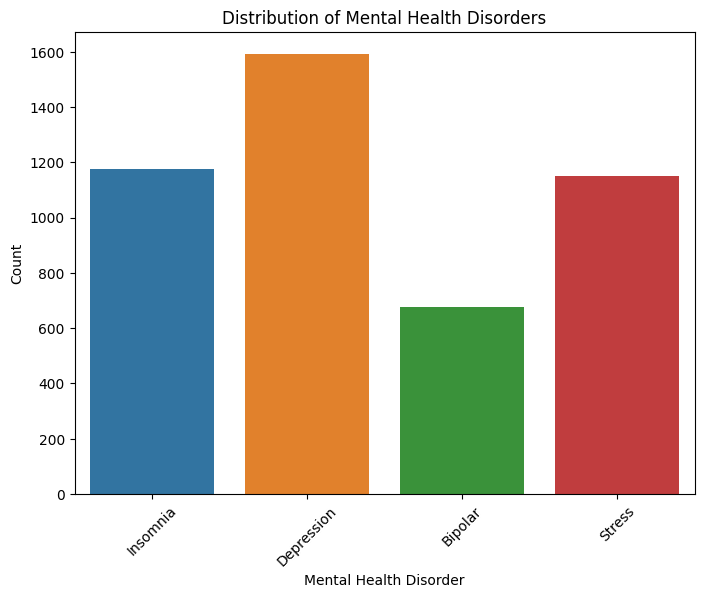

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df5)
plt.title('Distribution of Mental Health Disorders')
plt.xlabel('Mental Health Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

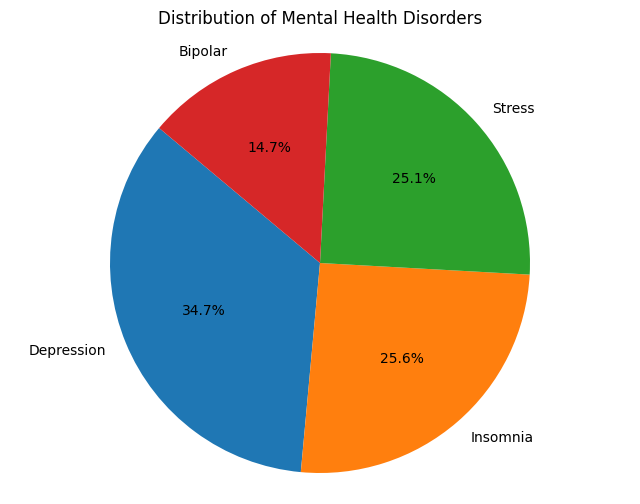

In [ ]:
category_counts = df5['category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Mental Health Disorders')
plt.axis('equal')
plt.show()

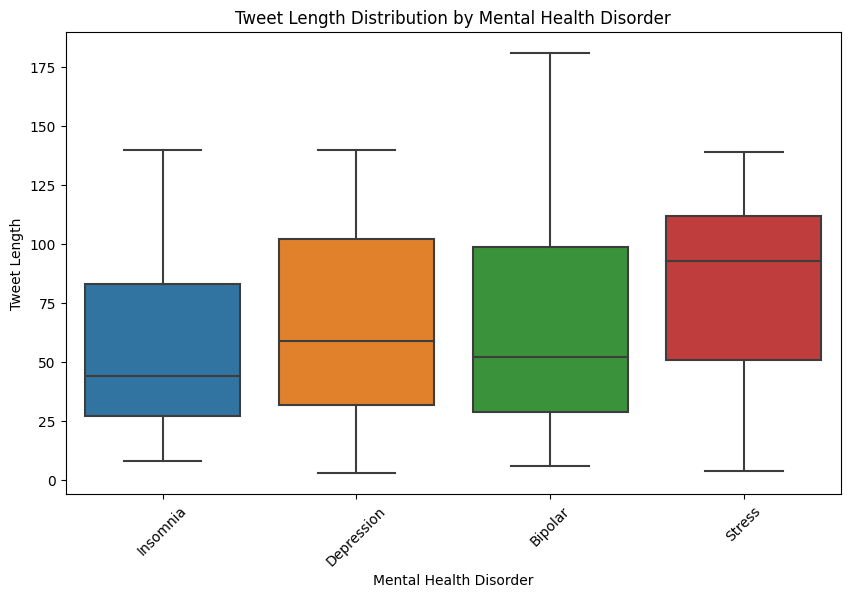

In [ ]:
df5['tweet_length'] = df5['tweet'].apply(len)
# Boxplot of tweet length by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='tweet_length', data=df5)
plt.title('Tweet Length Distribution by Mental Health Disorder')
plt.xlabel('Mental Health Disorder')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df5.drop('tweet_length',axis=1,inplace=True)

## Checking If data is balanced

In [ ]:
# Assuming 'target_column' is your target column in the DataFrame
class_distribution = df5['category'].value_counts()
print(class_distribution)

Depression    1592
Insomnia      1175
Stress        1151
Bipolar        676
Name: category, dtype: int64


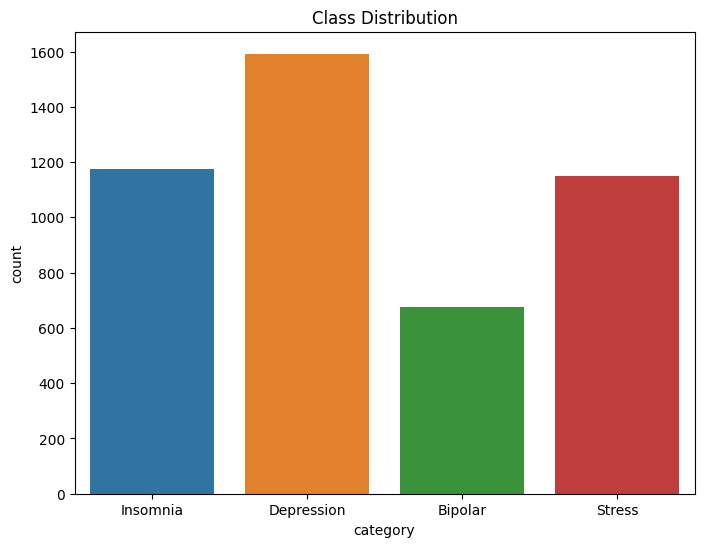

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df5)
plt.title('Class Distribution')
plt.show()


In [ ]:
class_ratios = df5['category'].value_counts(normalize=True)
print(class_ratios)

Depression    0.346539
Insomnia      0.255768
Stress        0.250544
Bipolar       0.147148
Name: category, dtype: float64


# Preprocessing

In [ ]:
# Download stopwords for Arabic language if not already downloaded
nltk.download('stopwords')

tweets = df5['tweet'].values.astype(str)
categories = df5['category'].values.astype(str)

# Tokenizer() from Keras preprocesses the text by converting words into sequences of integers based on their frequency
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

# Remove punctuation and special characters, convert to lowercase
cleaned_tweets = []
for tweet in tweets:
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    cleaned_tweets.append(tweet.lower())   # Convert to lowercase
tweets = cleaned_tweets

# Remove stopwords
stop_words = set(stopwords.words('arabic'))
tweets = [' '.join([word for word in tweet.split() if word not in stop_words]) for tweet in tweets]

#texts_to_sequences() converts text to sequences of integers based on the tokenization
sequences = tokenizer.texts_to_sequences(tweets)

#pad_sequences() ensures that all sequences have the same length for the LSTM model
max_sequence_length = 100  # Adjust as needed
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(sequences_padded)

[[    0     0     0 ...   324     3  3137]
 [    0     0     0 ...   385    31  5254]
 [    0     0     0 ...  3140  1711     2]
 ...
 [    0     0     0 ...    16    78    97]
 [    0     0     0 ...     0  1395    64]
 [    0     0     0 ...  1505   551 14474]]


In [ ]:
#Convert the text labels into numerical categorical values.
label_encoder = LabelEncoder()
encoded_categories = label_encoder.fit_transform(categories)

In [ ]:
print(encoded_categories)

[2 1 1 ... 1 1 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, encoded_categories, test_size=0.2, random_state=42,shuffle= True )

# Building the Model

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# # Create a function to build the Keras model
# def create_model():
#     #tokenizer.word_index is a Python dictionary that maps words (or tokens) to their respective unique integer indices.
#     #For example, after tokenizing the text, the word_index might look like: {'word1': 1, 'word2': 2, ...} where each word is associated with a unique integer index
#     #In this context, len(tokenizer.word_index) calculates the number of unique words (or tokens) in the vocabulary created by the tokenizer
#     #The addition of + 1 is done to account for a special index, usually reserved for padding or unknown tokens.
#     #In many tokenization processes, a special index is assigned for out-of-vocabulary words or for padding sequences to a fixed length. This special index is typically represented as 0 or <PAD> in the tokenized sequences.
#     vocab_size = len(tokenizer.word_index) + 1



#     #Embedding() layer converts the integer-encoded words into dense vectors of fixed size
#     # embedding_dim represents the dimensionality of the dense embedding vectors.
#     # In this case, embedding_dim is set to 128, meaning each word in the vocabulary will be represented as a dense vector of length 128 in the embedding space.
#     embedding_dim = 128
#     #Sequential() is a Keras function used to initialize a sequential model, allowing the creation of a linear stack of layers in the neural network.
#     model = Sequential()
#     # The layer takes as input a sequence of integers (each integer representing a word) with a specified length (input_length).
#     # It transforms each integer into a dense vector representation of size embedding_dim. For example, if vocab_size is 10,000 and embedding_dim is 128, each word will be represented as a dense vector of length 128.
#     # The embedding vectors are learned during the training process and are optimized to capture relationships and semantics between words based on the task at hand.
#     model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))



#     #LSTM() layer with dropout helps prevent overfitting.
#     #64 is the number of memory units for processing and storing information the higher the number of the memory units the better the capacity of the model to learn the complex patterns in the data
#     model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))

#     #Dense() output layer with softmax activation for multi-class classification
#     model.add(Dense(len(label_encoder.classes_), activation='softmax'))

#     model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# # Wrap the Keras model with scikit-learn's KerasClassifier
# model = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# # Define the parameters to tune
# param_grid = {'epochs': [3,5,8, 10, 15]}  # Example: try different epoch values

# # Perform grid search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(X_train, y_train)

# # Summarize results
# print("Best Epoch:", grid_result.best_params_['epochs'])
# print("Best Score:", grid_result.best_score_)


In [ ]:
#tokenizer.word_index is a Python dictionary that maps words (or tokens) to their respective unique integer indices.
#For example, after tokenizing the text, the word_index might look like: {'word1': 1, 'word2': 2, ...} where each word is associated with a unique integer index
#In this context, len(tokenizer.word_index) calculates the number of unique words (or tokens) in the vocabulary created by the tokenizer
#The addition of + 1 is done to account for a special index, usually reserved for padding or unknown tokens.
#In many tokenization processes, a special index is assigned for out-of-vocabulary words or for padding sequences to a fixed length. This special index is typically represented as 0 or <PAD> in the tokenized sequences.
vocab_size = len(tokenizer.word_index) + 1



#Embedding() layer converts the integer-encoded words into dense vectors of fixed size
# embedding_dim represents the dimensionality of the dense embedding vectors.
# In this case, embedding_dim is set to 128, meaning each word in the vocabulary will be represented as a dense vector of length 128 in the embedding space.
embedding_dim = 128
#Sequential() is a Keras function used to initialize a sequential model, allowing the creation of a linear stack of layers in the neural network.
model = Sequential()
# The layer takes as input a sequence of integers (each integer representing a word) with a specified length (input_length).
# It transforms each integer into a dense vector representation of size embedding_dim. For example, if vocab_size is 10,000 and embedding_dim is 128, each word will be represented as a dense vector of length 128.
# The embedding vectors are learned during the training process and are optimized to capture relationships and semantics between words based on the task at hand.
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))



#LSTM() layer with dropout helps prevent overfitting.
#64 is the number of memory units for processing and storing information the higher the number of the memory units the better the capacity of the model to learn the complex patterns in the data
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))

#Dense() output layer with softmax activation for multi-class classification
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


2024-01-02 08:56:12.832622: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-02 08:56:12.833781: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-02 08:56:12.833804: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-f31dbb80-cafe-4675-934c-b37fe65f843f): /proc/driver/nvidia/version does not exist
2024-01-02 08:56:12.836242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Train the LSTM Model:

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

In [ ]:
epochs =10

# dividing the entire dataset into smaller batches and iteratively feeding these batches to the model during training
batch_size = 62

import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

# Train the model and collect history for plotting learning curves
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])




Epoch 1/10
60/60 [==============================] - 25s 416ms/step - loss: 0.0095 - accuracy: 0.9992 - val_loss: 0.1680 - val_accuracy: 0.9456
Epoch 2/10
60/60 [==============================] - 25s 413ms/step - loss: 0.0054 - accuracy: 0.9995 - val_loss: 0.1750 - val_accuracy: 0.9489
Epoch 3/10
60/60 [==============================] - 25s 414ms/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.1936 - val_accuracy: 0.9510
Epoch 4/10
60/60 [==============================] - 25s 420ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.1967 - val_accuracy: 0.9543
Epoch 5/10
60/60 [==============================] - 25s 414ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.1764 - val_accuracy: 0.9434
Epoch 6/10
60/60 [==============================] - 25s 419ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.1946 - val_accuracy: 0.9456


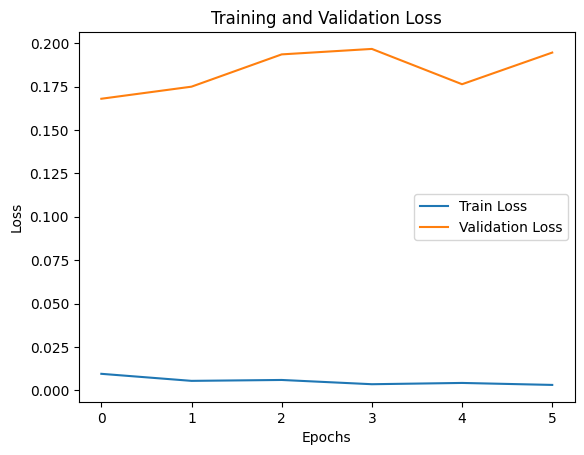

In [ ]:
# Plot learning curves using the collected history
plot_learning_curves(history)

# Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

29/29 [==============================] - 2s 50ms/step - loss: 0.1967 - accuracy: 0.9543
Test Accuracy: 95.43%


# Making predictions on test data

In [ ]:
predictions = model.predict(X_test)

29/29 [==============================] - 1s 52ms/step


In [ ]:
print(predictions)

[[6.4720184e-02 2.5038621e-01 6.8268560e-02 6.1662507e-01]
 [5.1110814e-04 9.9667478e-01 3.9217176e-04 2.4218897e-03]
 [6.0671273e-06 2.0093050e-05 4.8775270e-05 9.9992496e-01]
 ...
 [3.0945965e-05 2.5170746e-05 9.9990880e-01 3.5067475e-05]
 [1.7197066e-04 9.9935788e-01 1.4929462e-04 3.2082881e-04]
 [1.0264425e-05 5.0912397e-05 7.1858405e-05 9.9986696e-01]]


In [ ]:
# Assuming 'categories' contains your category labels from the dataset
categories = [
 "Depression",
    "Insomnia",
    "Stress",
    "Bipolar"
]  

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the categories
label_encoder.fit(categories)

# Convert predicted probabilities to class labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Create a DataFrame to display tweets, predicted categories, and their probabilities
result_df = pd.DataFrame({
    'Tweet': list(X_test),  # Convert X_test to a list if it's not already
    'Predicted_Category': predicted_labels,
    'Probability': np.max(predictions, axis=1)  # Probability of the predicted category
})

# Display the DataFrame
result_df.head(10)

,Tweet,Predicted_Category,Probability
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Stress,0.616625
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Depression,0.996675
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Stress,0.999925
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Insomnia,0.999909
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Insomnia,0.999982
5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Stress,0.999886
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Bipolar,0.951932
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Stress,0.819749
8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Depression,0.999787
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Stress,0.966809


In [ ]:
categories = [
    "Depression",
    "Insomnia",
    "Stress",
    "Bipolar"
]  

# Initialize the LabelEncoder and fit on the categories
label_encoder = LabelEncoder()
label_encoder.fit(categories)

# Decode the encoded labels back to their original values
y_test_decoded = label_encoder.inverse_transform(y_test)

# 'y_test_decoded' now contains the original category names
print(y_test_decoded)

['Stress' 'Depression' 'Stress' 'Insomnia' 'Insomnia' 'Stress' 'Bipolar'
 'Depression' 'Depression' 'Stress' 'Depression' 'Bipolar' 'Depression'
 'Stress' 'Depression' 'Bipolar' 'Stress' 'Depression' 'Depression'
 'Insomnia' 'Stress' 'Depression' 'Stress' 'Depression' 'Insomnia'
 'Stress' 'Depression' 'Depression' 'Stress' 'Stress' 'Insomnia' 'Bipolar'
 'Stress' 'Depression' 'Bipolar' 'Depression' 'Insomnia' 'Depression'
 'Stress' 'Bipolar' 'Depression' 'Insomnia' 'Bipolar' 'Depression'
 'Depression' 'Depression' 'Depression' 'Bipolar' 'Stress' 'Insomnia'
 'Stress' 'Depression' 'Stress' 'Depression' 'Stress' 'Bipolar' 'Stress'
 'Insomnia' 'Insomnia' 'Depression' 'Depression' 'Stress' 'Bipolar'
 'Depression' 'Insomnia' 'Bipolar' 'Stress' 'Insomnia' 'Stress' 'Insomnia'
 'Bipolar' 'Insomnia' 'Insomnia' 'Depression' 'Bipolar' 'Bipolar' 'Stress'
 'Depression' 'Bipolar' 'Stress' 'Insomnia' 'Depression' 'Insomnia'
 'Depression' 'Depression' 'Stress' 'Stress' 'Stress' 'Depression'
 'Stress' 'I

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test_decoded, predicted_labels)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.95


# Using Form collected data to test

In [ ]:
t1=pd.read_csv('Responses testing.csv')

In [ ]:
t1.head()

,tweet,category
0,حريه,Neutral
1,رضاء,Depression
2,زعلان من نفسي ومش عارف انا بعمل كدا ليه وعمري ...,Anxiety
3,قلقان,Anxiety
4,اكتر حاجة مدمرة فكل دا اني شايله جوايا عشان مب...,Anxiety


In [ ]:
t1['category'].unique()

array(['Neutral', 'Depression', 'Anxiety', 'Happiness', 'Excitmenet',
       'Stress'], dtype=object)

In [ ]:
categories_to_keep = ['Depression', 'Stress'] 
t1 = t1[t1['category'].isin(categories_to_keep)]

In [ ]:
t1.head()

,tweet,category
1,رضاء,Depression
10,مش عارفه,Stress
11,حاسس اني مزنوق في دراستي,Stress
12,متوترة و خايفة بس ان شاء الله خير. رب الخير لا...,Stress
13,حزن,Stress


In [ ]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 63
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     30 non-null     object
 1   category  30 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [ ]:
# Download stopwords for Arabic language if not already downloaded
nltk.download('stopwords')

tweets = t1['tweet'].values.astype(str)
categories = t1['category'].values.astype(str)

# Tokenizer() from Keras preprocesses the text by converting words into sequences of integers based on their frequency
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)

# Remove punctuation and special characters, convert to lowercase
cleaned_tweets = []
for tweet in tweets:
    tweet = re.sub(r'[^\w\s]', '', tweet)  
    cleaned_tweets.append(tweet.lower())  
tweets = cleaned_tweets
# Remove stopwords
stop_words = set(stopwords.words('arabic'))
tweets = [' '.join([word for word in tweet.split() if word not in stop_words]) for tweet in tweets]


#texts_to_sequences() converts text to sequences of integers based on the tokenization
sequences = tokenizer.texts_to_sequences(tweets)

#pad_sequences() ensures that all sequences have the same length for the LSTM model
max_sequence_length = 100  # Adjust as needed
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
predictions = model.predict(sequences_padded)

1/1 [==============================] - 0s 83ms/step


In [ ]:
print(predicted_labels)

['Depression' 'Depression' 'Stress' 'Insomnia' 'Insomnia' 'Stress'
 'Bipolar' 'Stress' 'Depression' 'Stress' 'Depression' 'Bipolar'
 'Depression' 'Stress' 'Depression' 'Bipolar' 'Stress' 'Depression'
 'Depression' 'Insomnia' 'Stress' 'Depression' 'Stress' 'Depression'
 'Insomnia' 'Depression' 'Depression' 'Depression' 'Stress' 'Stress'
 'Insomnia' 'Bipolar' 'Stress' 'Depression' 'Bipolar' 'Depression'
 'Insomnia' 'Depression' 'Depression' 'Bipolar' 'Depression' 'Insomnia'
 'Bipolar' 'Depression' 'Depression' 'Depression' 'Depression' 'Bipolar'
 'Stress' 'Insomnia' 'Stress' 'Depression' 'Stress' 'Depression' 'Stress'
 'Bipolar' 'Depression' 'Insomnia' 'Insomnia' 'Depression' 'Depression'
 'Stress' 'Bipolar' 'Depression' 'Insomnia' 'Bipolar' 'Stress' 'Insomnia'
 'Stress' 'Insomnia' 'Bipolar' 'Insomnia' 'Insomnia' 'Depression'
 'Bipolar' 'Bipolar' 'Stress' 'Depression' 'Bipolar' 'Stress' 'Insomnia'
 'Depression' 'Insomnia' 'Depression' 'Depression' 'Stress' 'Stress'
 'Stress' 'Depression'

In [ ]:
# Assuming 'categories' contains your category labels from the dataset
categories = [
 "Depression",
    "Insomnia",
    "Stress",
    "Bipolar"
]  

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the categories
label_encoder.fit(categories)

# Convert predicted probabilities to class labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Create a DataFrame to display tweets, predicted categories, and their probabilities
result_df = pd.DataFrame({
    'Tweet': list(X_test),  # Convert X_test to a list if it's not already
    'Predicted_Category': predicted_labels,
})

# Display the DataFrame
result_df.head(10)

ValueError: arrays must all be same length

In [ ]:
# Calculate accuracy by comparing predicted labels with ground truth labels
accuracy = accuracy_score(categories, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [4, 30]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f31dbb80-cafe-4675-934c-b37fe65f843f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>